# Pittsburgh's Best Neighborhood

Group Members: Rachel Farrell (rmf101@pitt.edu), Anna Yaksich(ady13@pitt.edu), Jiangjiang Song (jis110@pitt.edu)

Group Name: Four Loop

Data Sets: https://data.wprdc.org/dataset/pgh/resource/bd152875-a14d-421a-8656-cc896a7e9074 (crime.cvs)


Metrics: Crime, Percentage of Population Enrolled in School, Employment, Access to public transportation, Access to medical care

On our quest to find the best neighborhood, we considered many different factors. These factors include Crime, Percentage of Population Enrolled in School, Employment, Access to Public Transportation, and Access to Medical Care. We would analyze different data sets using these metrics, and then look for neighborhoods that overlapped in our findings. Using as many metrics as we did made it difficult to find these overlaps, so in the future, it would have been smart to use less metrics or metrics that loosely relate to eachother to help ensure that we will come to a conclusion about what the best neighborhood is.

# Crime

First we must analyze whether the neighborhood is safe. We will do this by analyzing the crime rates. Anaylzing crime is more a way to eliminate bad neighborhoods than find the best neighborhood

In [3]:
#imports
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
#open crime data file from 2010 Pittsburgh SNAP data
crime = pd.read_csv("crime.csv")
crime.head(10)

,Neighborhood,Sector #,Population (2010),#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
0,Allegheny Center,3,933,71,141,46,7.6,15.1,0,2,9,5,8,5,31
1,Allegheny West,3,462,38,49,31,8.2,10.6,1,0,4,6,6,4,12
2,Allentown,6,"2,500",159,252,160,6.4,10.1,0,2,15,23,48,11,66
3,Arlington,7,"1,869",50,84,48,2.7,4.5,0,1,8,5,15,7,9
4,Arlington Heights,7,244,19,37,24,7.8,15.2,0,0,4,5,5,3,7
5,Banksville,5,"4,144",62,81,61,1.5,2.0,0,0,2,5,9,5,7
6,Bedford Dwellings,15,"1,202",42,80,38,3.5,6.7,0,0,7,8,8,2,25
7,Beechview,5,"7,974",193,303,148,2.4,3.8,1,1,7,9,47,37,29
8,Beltzhoover,6,"1,925",83,131,85,4.3,6.8,1,0,6,10,28,8,38
9,Bloomfield,12,"8,442",453,371,296,5.4,4.4,0,3,45,20,70,36,42


In [5]:
#only show Rape, murder and robbery
crime[['Neighborhood', '#Rape (2010)', '#Murder (2010)', '#Robbery (2010)']]

,Neighborhood,#Rape (2010),#Murder (2010),#Robbery (2010)
0,Allegheny Center,2,0,9
1,Allegheny West,0,1,4
2,Allentown,2,0,15
3,Arlington,1,0,8
4,Arlington Heights,0,0,4
5,Banksville,0,0,2
6,Bedford Dwellings,0,0,7
7,Beechview,1,1,7
8,Beltzhoover,0,1,6
9,Bloomfield,3,0,45


In [6]:
#get an idea of the average number of rapes, murders, and robberies in pittsburgh. This will be used as a comparison
crime[['Neighborhood', '#Rape (2010)', '#Murder (2010)', '#Robbery (2010)']].describe()

,#Rape (2010),#Murder (2010),#Robbery (2010)
count,90.000000,90.000000,90.000000
mean,0.722222,0.511111,11.533333
std,1.132044,0.950983,13.042885
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000
50%,0.000000,0.000000,7.000000
75%,1.000000,1.000000,16.000000
max,6.000000,5.000000,63.000000


In [7]:
#get rid of neighborhoods that have more than average murders
murder = crime[crime['#Murder (2010)'] < 0.5]
#get rid of neighborhoods that have more than average rapes
rape = murder[murder['#Rape (2010)'] < 0.72]
#get rid of neighborhoods that have more than average robberies
robbery = rape[rape['#Robbery (2010)'] < 11.5]
#display a list of neighborhoods that have below average muders, rapes, and robberies
robbery[['Neighborhood','#Murder (2010)','#Rape (2010)', '#Robbery (2010)']]

,Neighborhood,#Murder (2010),#Rape (2010),#Robbery (2010)
4,Arlington Heights,0,0,4
5,Banksville,0,0,2
6,Bedford Dwellings,0,0,7
11,Bon Air,0,0,1
20,Chartiers City,0,0,0
21,Chateau,0,0,1
24,Duquesne Heights,0,0,0
26,East Carnegie,0,0,0
30,Esplen,0,0,5
31,Fairywood,0,0,0


In [8]:
robbery['Neighborhood'].count()

28

To be considered a safe neighborhood, there must be below average murders, rapes, and robberies. After filtering out neighborhoods that have above average crimes, we are left with a list of 28 potential neighborhoods, as seen above.

In [9]:
#get rid of neighborhoods that have more than 0 murders
murder = crime[crime['#Murder (2010)'] == 0]
#get rid of neighborhoods that have more than 0 rapes
rape = murder[murder['#Rape (2010)'] == 0]
#get rid of neighborhoods that have more than 0 robberies
robbery = rape[rape['#Robbery (2010)'] == 0]
#display a list of neighborhoods that have below average muders, rapes, and robberies
robbery[['Neighborhood','#Murder (2010)','#Rape (2010)', '#Robbery (2010)']]

,Neighborhood,#Murder (2010),#Rape (2010),#Robbery (2010)
20,Chartiers City,0,0,0
24,Duquesne Heights,0,0,0
26,East Carnegie,0,0,0
31,Fairywood,0,0,0
37,Hays,0,0,0
54,New Homestead,0,0,0
66,Ridgemont,0,0,0
77,St. Clair,0,0,0
80,Summer Hill,0,0,0
81,Swisshelm Park,0,0,0


In [10]:
robbery['Neighborhood'].count()

10

To be considered a safe neighborhood, ideally, there should be no murders, rapes, and robberies. After filtering out neighborhoods that have had any murders, rapes, or robberies, we are left with a list of 10 potential neighborhoods, as seen above.

In [11]:
#get an idea of the average number of rapes, murders, robberies, and assaults in pittsburgh. This will be used as a comparison
crime[['Neighborhood', '#Rape (2010)', '#Murder (2010)', '#Robbery (2010)', '#Agr. Assault (2010)']].describe()

,#Rape (2010),#Murder (2010),#Robbery (2010),#Agr. Assault (2010)
count,90.000000,90.000000,90.000000,90.000000
mean,0.722222,0.511111,11.533333,10.611111
std,1.132044,0.950983,13.042885,10.519852
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,3.250000
50%,0.000000,0.000000,7.000000,7.000000
75%,1.000000,1.000000,16.000000,14.750000
max,6.000000,5.000000,63.000000,61.000000


In [12]:
#get rid of neighborhoods that have more than average assaults
assault = robbery[robbery['#Agr. Assault (2010)'] < 10.6]
assault[['Neighborhood','#Murder (2010)','#Rape (2010)', '#Robbery (2010)', '#Agr. Assault (2010)']]

,Neighborhood,#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010)
20,Chartiers City,0,0,0,4
24,Duquesne Heights,0,0,0,4
26,East Carnegie,0,0,0,1
31,Fairywood,0,0,0,0
37,Hays,0,0,0,1
54,New Homestead,0,0,0,0
66,Ridgemont,0,0,0,1
77,St. Clair,0,0,0,2
80,Summer Hill,0,0,0,1
81,Swisshelm Park,0,0,0,0


To filter this list down even more, we can assess aggrevated assuaults. After filtering out neighborhoods that have had above average assaults, we are left with a list of 10 potential neighborhoods. This list is not any different from our privious list, so next we must be more selective to further cut down our list.

In [16]:
#get rid of neighborhoods that have any assaults
assault = robbery[robbery['#Agr. Assault (2010)'] == 0]
assault[['Neighborhood','#Murder (2010)','#Rape (2010)', '#Robbery (2010)', '#Agr. Assault (2010)']]

,Neighborhood,#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010)
31,Fairywood,0,0,0,0
54,New Homestead,0,0,0,0
81,Swisshelm Park,0,0,0,0


In [17]:
assault['Neighborhood'].count()

3

Here we have eliminated all neighborhoods that have had any murders, rapes, robberies or assaults. This leaves us with a list of 3 neighborhoods that have low crime, that are potential candidates for the best neighborhood. However, we must consider the population of these neighborhoods to appropriately compare their crime rates. 

Text(0.5,0,'Crime per 100 Persons')

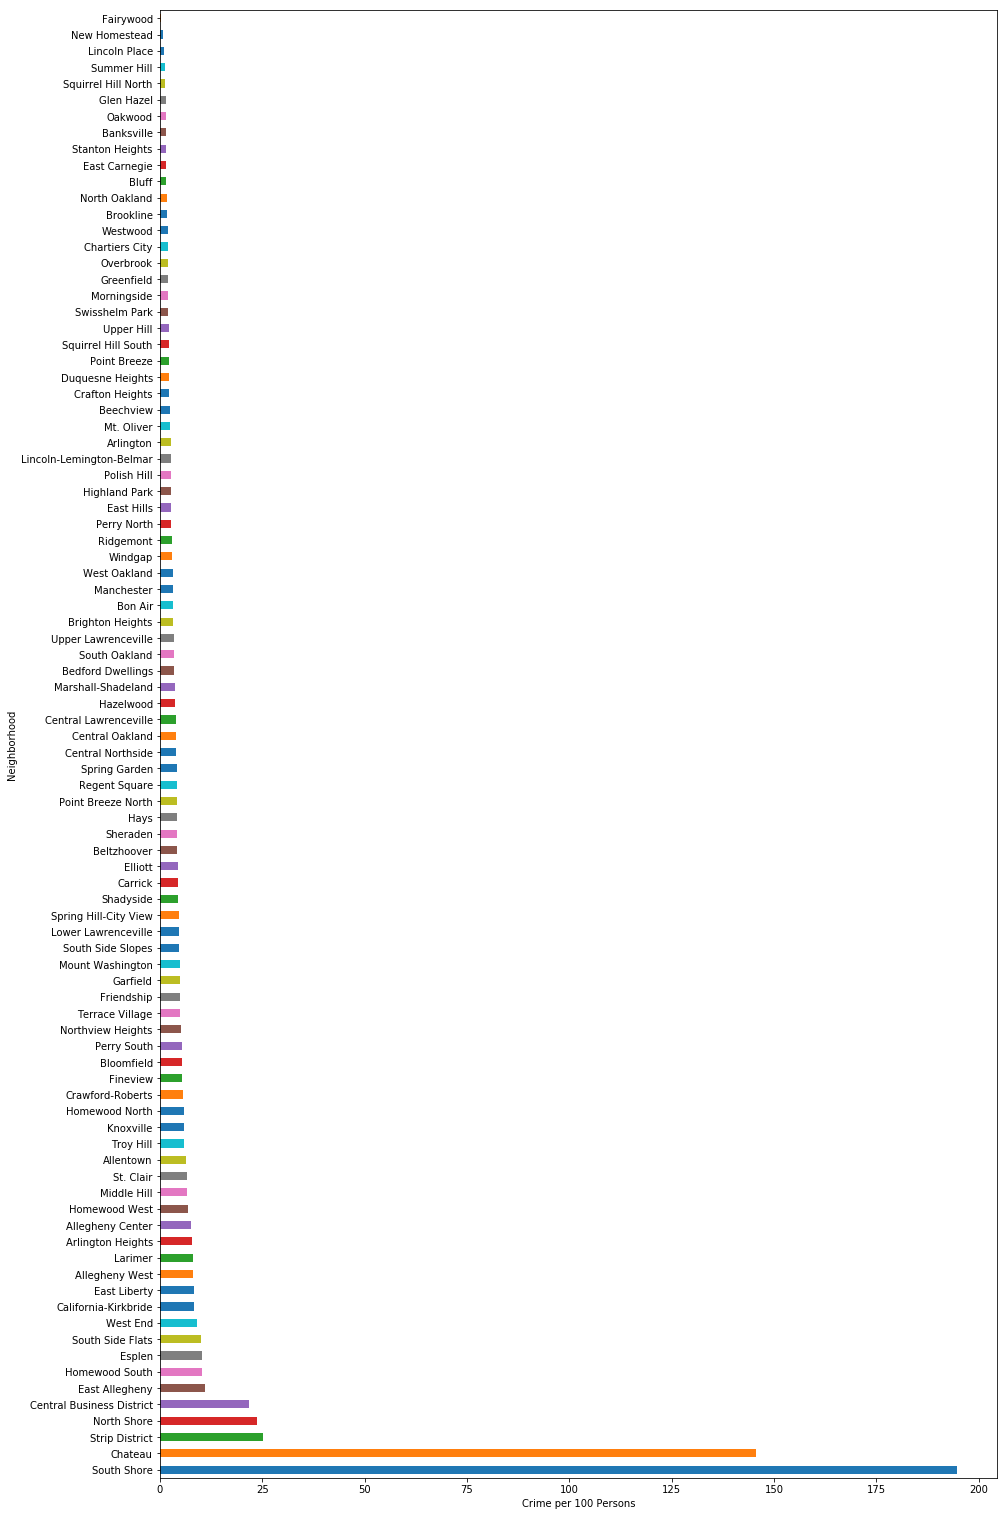

In [28]:
#sort out the data by crime per 100 persons
crimesort = crime.sort_values(by=["Part 1 Crime per 100 Persons (2010)"], ascending=False)
#display the data as a bar graph
graph = crimesort.plot.barh(x="Neighborhood",y="Part 1 Crime per 100 Persons (2010)",figsize=(15,crime.shape[0] * 0.3), legend=None)
graph.set_xlabel("Crime per 100 Persons")

This graph allows us to compare the neighborhoods crime per 100 persons. We are only interested in neighborhoods with low crime, so we will only examine the lower end of the graph next.

Text(0.5,0,'Crime per 100 Persons')

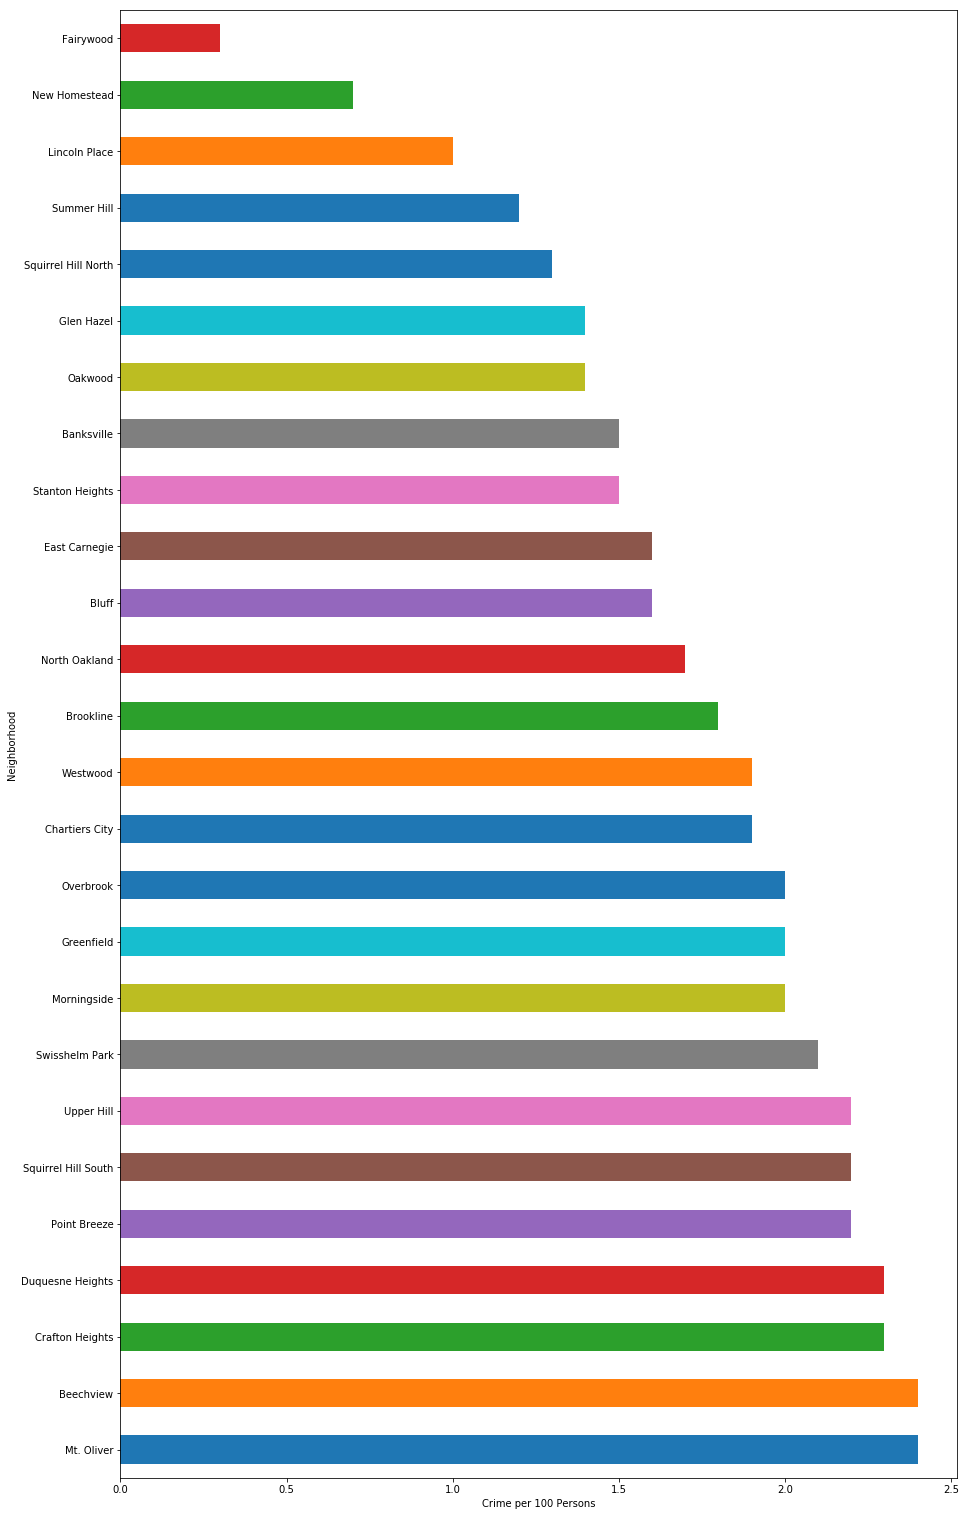

In [29]:
#sort out the data by crime per 100 persons
crimesort = crime.sort_values(by=["Part 1 Crime per 100 Persons (2010)"], ascending=False)
#only show the lower end of the data, because we only want neighborhoods with low crime rates
graph = crimesort[64:].plot.barh(x="Neighborhood",y="Part 1 Crime per 100 Persons (2010)",figsize=(15,crime.shape[0] * 0.3), legend=None)
graph.set_xlabel("Crime per 100 Persons")

Here we get a better idea of what neighborhoods have low crime rates. if we cross reference this graph with the preivous list of 10 neighborhoods we created earlier, we will get a smaller list of potential "best" neightborhoods. 

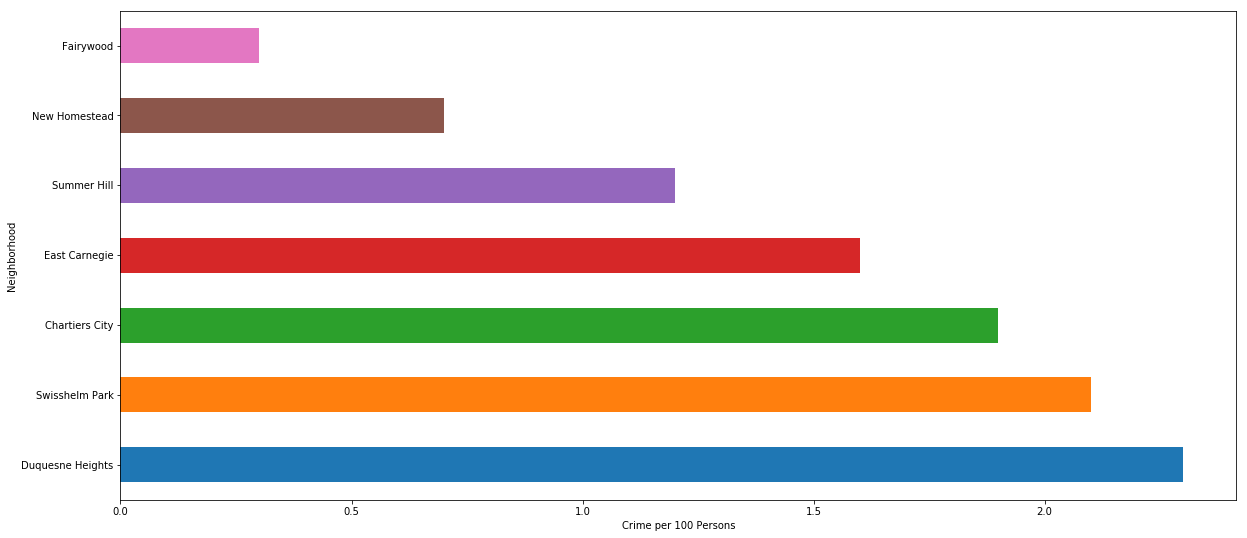

In [76]:
shortlist = assault.sort_values(by=["Part 1 Crime per 100 Persons (2010)"], ascending=False)

graph = shortlist[3:].plot.barh(x="Neighborhood",y="Part 1 Crime per 100 Persons (2010)",figsize=(20,crime.shape[0] * 0.1), legend=None)
graph.set_xlabel("Crime per 100 Persons")
graph.get_figure().savefig('shortlist.pdf')

Now we are left with a list of 7 potential neighborhoods that could be considered Pittsburgh's best neighborhood. 

## Conclusion from analyzing crime metric
After analyzing each neighorhood based on their number of rapes, murders, robberies, and assualts, and then the crimes per 100 persons, we have declared that Pittsburgh's best neighborhood must be one of the following neighborhoods.
* Fairywood
* New Homestead
* Summer Hill
* East Carnegie
* Chartiers City
* Swisshelm Park
* Duquesne Heights

# Percentage of Population Enrolled in School

So now we are looking at the amount of students enrolled in a neighborhood. Our ideal neigborhood doesn't have too many kids or too many retired residents, creating a well balanced community. In other words we are looking for the neighborhood with an average amount of students enrolled in school.

In [ ]:
import numpy as np
import geopandas as gpd

education = pd.read_csv("Education.csv")
education.head()

These are the numbers found from this data set, including the average/mean:

In [ ]:
percentOfTotalEnrolledInSchool = (education["Estimate; Enrolled in school:"]/education["Estimate; Total:"])
percentOfTotalEnrolledInSchool.describe()

Now to look at the distribution of percent enrolled in school we create a bar graph. The neighborhoods nearest to 26% is what we are looking for.

In [ ]:
import pandas as pd
file = pd.read_csv("Education.csv")

for neighborhood in file.index:
    population = float(file.iloc[neighborhood,2])
    enrolledInSchool = float(file.iloc[neighborhood,4])
    file.iloc[neighborhood,2] = population
    file.iloc[neighborhood,4] = (enrolledInSchool) / population * 100
    
file = file.sort_values(by=["Estimate; Enrolled in school:"], ascending=False)

graph = file.plot.barh(x="Neighborhood",y="Estimate; Enrolled in school:",figsize=(15,file.shape[0] * 0.3), legend=None)
graph.set_xlabel("% Enrolled in School")
graph.get_figure().savefig('figure.pdf')

## Conclusion from Analysis of Percentage of the Population Enrolled in School Metric
From this distribution we see that New Homestead, South Side Slopes, Bloomfield, Crawford Roberts, and Perry South are closest to the mean of 26%. Comparing this list to the list of neighborhoods with the lowest crime, New Homestead overlaps.

# Employment

In [ ]:
# imports
import pandas as pd
file = pd.read_csv("employment.csv")

# Change data type and assign desired values
for neighborhood in file.index:
    population = int(file.iloc[neighborhood,2].replace(',', ''))
    employment = int(file.iloc[neighborhood,3].replace(',', ''))
    file.iloc[neighborhood,2] = population
    file.iloc[neighborhood,3] = (population-employment) / population * 100
    
file = file.sort_values(by=["Total Age 16+ N'hood Residents Employed (2010 Est.)"], ascending=False)

graph = file.plot.barh(x="Neighborhood",y="Total Age 16+ N\'hood Residents Employed (2010 Est.)",figsize=(15,file.shape[0] * 0.3), legend=None)
graph.set_xlabel("Unemployment rate in %")
graph.get_figure().savefig('figure.pdf')

## Conclusion from Analysis of Employment Metric

insert conclusion statement here

# Access to Public Transportation

## Conclusion from Access to Public Transportation Metric

insert conclusion here

# Access to Health Care

## Conclusion from Access to Health Care Metric

insert conclusion statement here

# Best Pittsburgh Neighborhood: *New Homestead*

## Reflections

**Rachel's Reflection:** Although New Homestead was the best neighborhood based on the data, my personal favorite neighborhood is Shadyside. Yes New Homestead is safe and ideal in terms of safety, employment, and school enrollment demographics, but at my age Shadyside is the best neighborhood as I enjoy all the food spots and shopping locations that are available and that is what is missing from New Homestead to make it best neighborhood in my eyes.

**Anna's Reflection:** I've lived in Pittsburgh my whole entire life, and I have never visted New Homestead, so it is difficult for me to evaluate whether our data supports my opinion of the area. My current favorite neighborhood is the North Shore because it is beautiful and is very people friendly. They have plenty of good restaurants, Stage AE for music, and Heinz Field for sporting events. I appreciate the combination of the city and Nature, as it's along the river. I also really enjoy the trails that are perfect for biking. Our metrics, however, don't really fit my definition of what a good neighborhood is, because my definition of a good neighborhood is based off of entertainment and cleanliness. Our metrics were more focused on a neighborhood thats good to live in, but I am not at the point in my life where I care about those metrics when deciding what is a good neighborhood. That does not undermine the significance of our data and our findings, as they are still relevant, but they are not relevant to me at this point in my life.

**Jiangjiang's Reflection:**